In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from numpy import int64

In [437]:
report=pd.read_csv(r"https://raw.githubusercontent.com/training-ml/Files/main/titanic_train.csv")
report

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [438]:
report.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [439]:
report.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [440]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [441]:
report.isnull()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

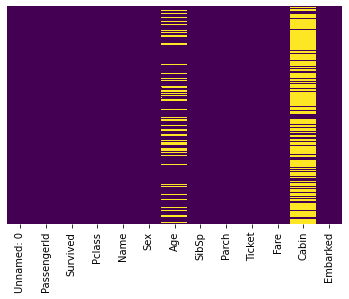

In [442]:
sns.heatmap(report.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [443]:
report.drop(['Age','Cabin'],axis=1,inplace=True)

In [444]:
report

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [445]:
report=report.dropna()
report.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [446]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   889 non-null    int64  
 1   PassengerId  889 non-null    int64  
 2   Survived     889 non-null    int64  
 3   Pclass       889 non-null    int64  
 4   Name         889 non-null    object 
 5   Sex          889 non-null    object 
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 83.3+ KB


In [447]:
report

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [448]:
report.shape

(889, 11)

In [449]:
report.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [425]:
#Categorical Data Visualization
data_visualization_nominal=report[['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']].copy()

In [426]:
data_visualization_nominal.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

3    491
1    214
2    184
Name: Pclass, dtype: int64


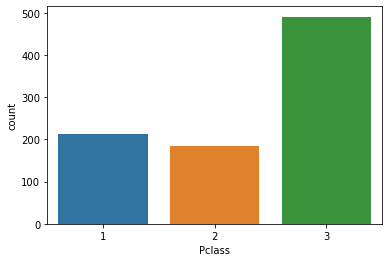

In [401]:
report=sns.countplot(x='Pclass',data=data_visualization_nominal)
print(data_visualization_nominal['Pclass'].value_counts())

<AxesSubplot:xlabel='Survived', ylabel='count'>

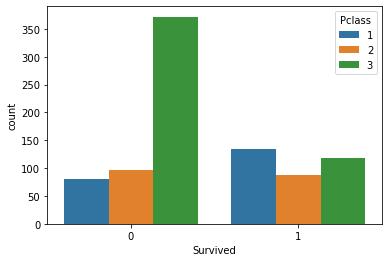

In [428]:
sns.countplot(x='Survived',hue='Pclass',data=report)

male      577
female    312
Name: Sex, dtype: int64


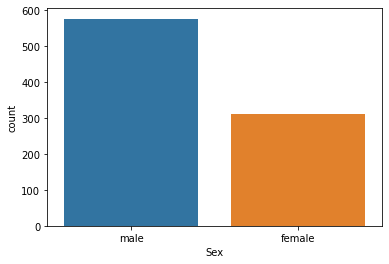

In [429]:
report=sns.countplot(x='Sex',data=data_visualization_nominal)
print(data_visualization_nominal['Sex'].value_counts())

0    549
1    340
Name: Survived, dtype: int64


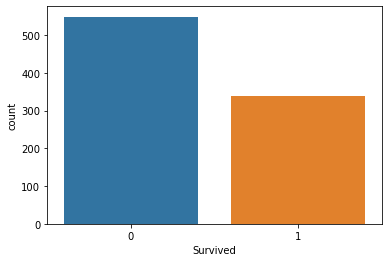

In [430]:
report=sns.countplot(x='Survived',data=data_visualization_nominal)
print(data_visualization_nominal['Survived'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


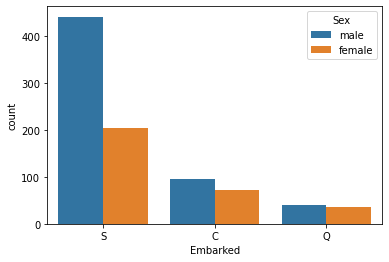

In [431]:
report=sns.countplot(x='Embarked',hue='Sex',data=data_visualization_nominal)
print(data_visualization_nominal['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


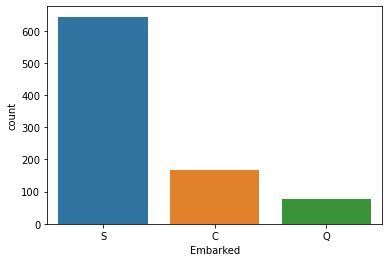

In [432]:
report=sns.countplot(x='Embarked',data=data_visualization_nominal)
print(data_visualization_nominal['Embarked'].value_counts())

<AxesSubplot:xlabel='SibSp', ylabel='count'>

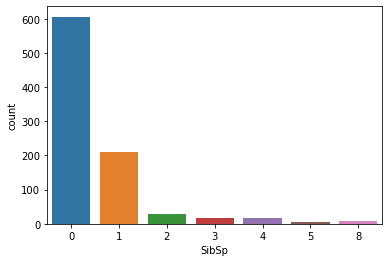

In [450]:
sns.countplot(x='SibSp',data=report)

<AxesSubplot:>

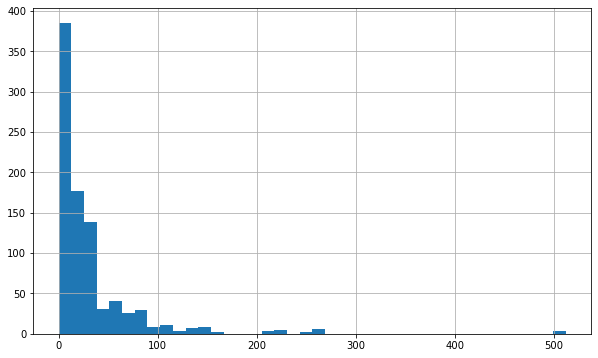

In [451]:
report['Fare'].hist(bins=40,figsize=(10,6))

<AxesSubplot:xlabel='Unnamed: 0', ylabel='Survived'>

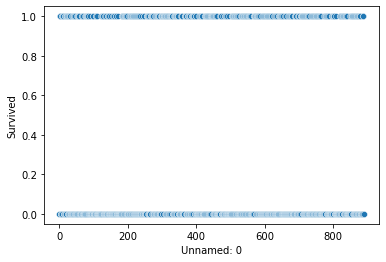

In [455]:
sns.scatterplot(x="Unnamed: 0",y='Survived',data=report)

<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>

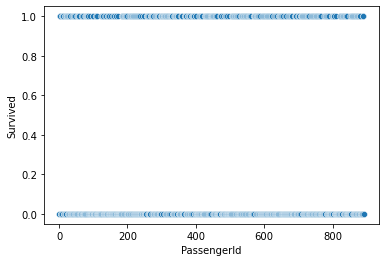

In [249]:
sns.scatterplot(x="PassengerId",y='Survived',data=report)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

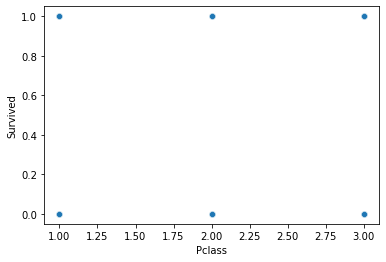

In [250]:
sns.scatterplot(x="Pclass",y='Survived',data=report)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

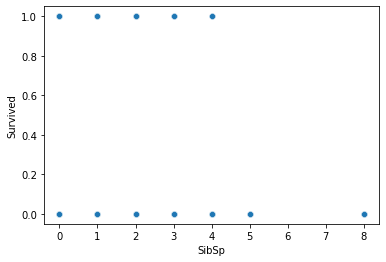

In [251]:
sns.scatterplot(x="SibSp",y='Survived',data=report)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

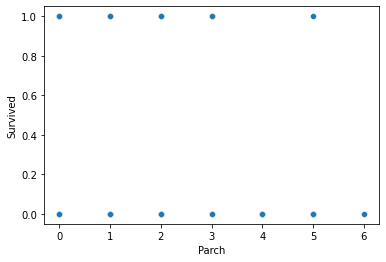

In [252]:
sns.scatterplot(x="Parch",y='Survived',data=report)

<AxesSubplot:xlabel='Ticket', ylabel='Survived'>

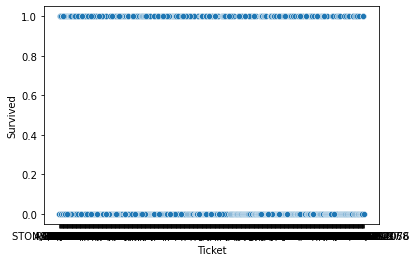

In [253]:
sns.scatterplot(x="Ticket",y='Survived',data=report)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

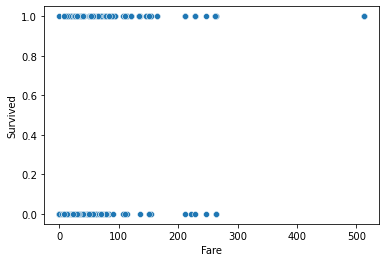

In [254]:
sns.scatterplot(x="Fare",y='Survived',data=report)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

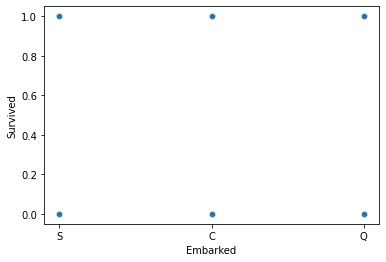

In [255]:
sns.scatterplot(x="Embarked",y='Survived',data=report)

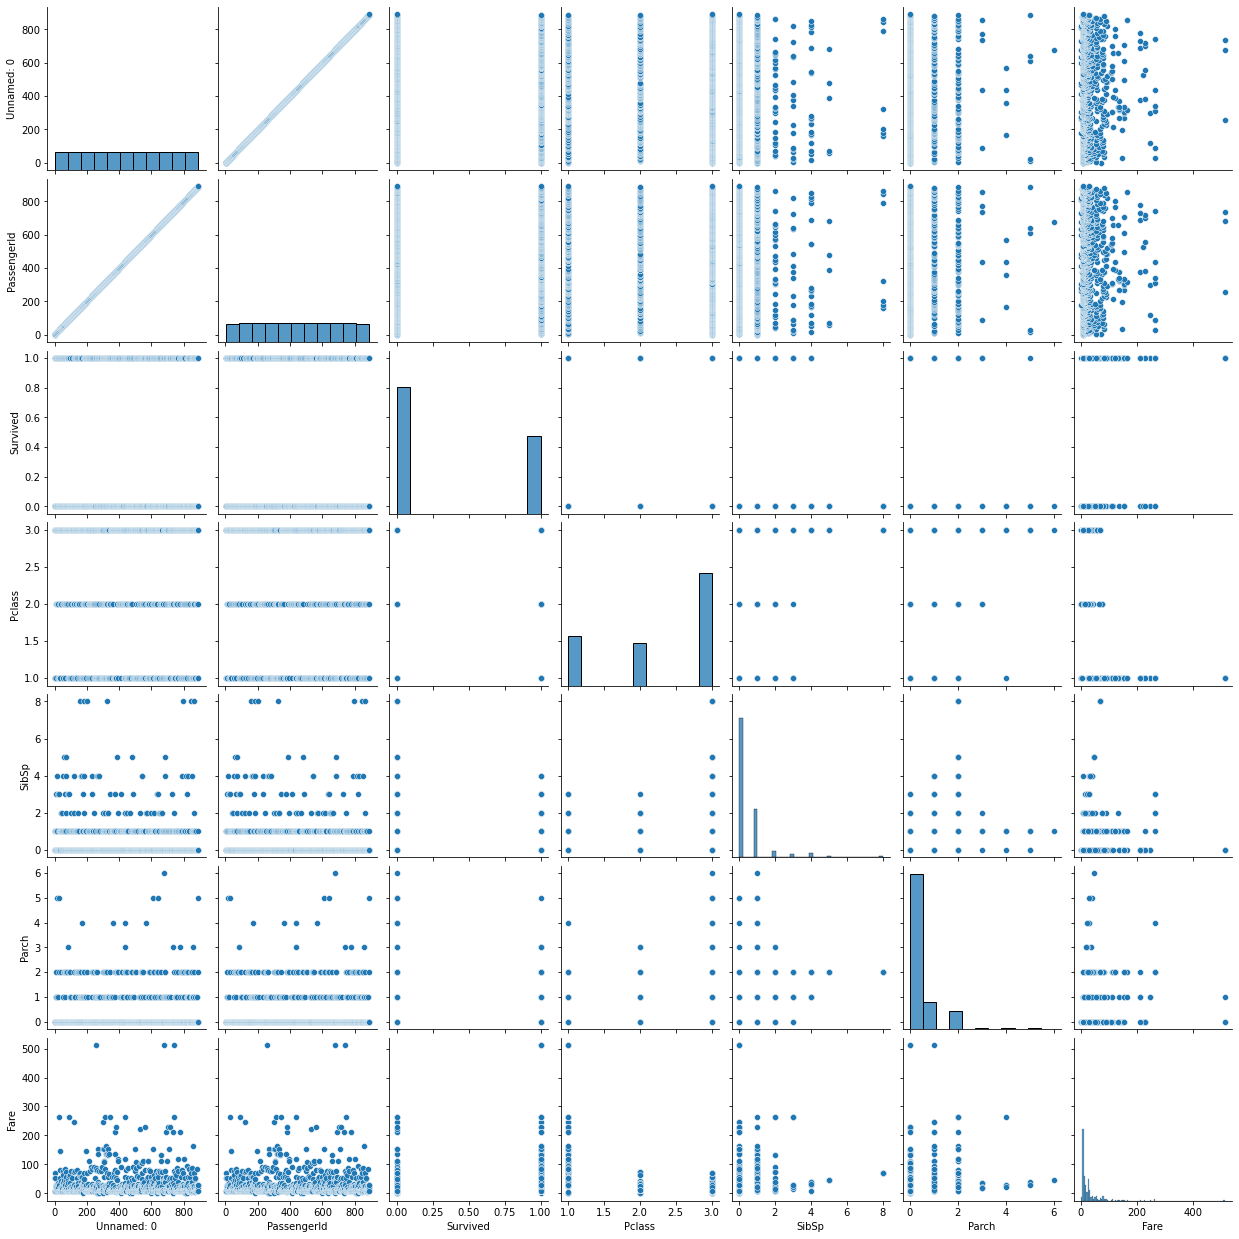

In [456]:
sns.pairplot(report)

In [457]:
#encoding dataframe
from sklearn.preprocessing import OrdinalEncoder
data_2=OrdinalEncoder()


In [460]:
for i in report.columns:
    if report[i].dtypes=='object':
        report[i]=data_2.fit_transform(report[i].values.reshape(-1,1))
report

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,108.0,1.0,1,0,522.0,7.2500,2.0
1,1,2,1,1,190.0,0.0,1,0,595.0,71.2833,0.0
2,2,3,1,3,353.0,0.0,0,0,668.0,7.9250,2.0
3,3,4,1,1,272.0,0.0,1,0,48.0,53.1000,2.0
4,4,5,0,3,15.0,1.0,0,0,471.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,547.0,1.0,0,0,100.0,13.0000,2.0
887,887,888,1,1,303.0,0.0,0,0,14.0,30.0000,2.0
888,888,889,0,3,412.0,0.0,1,2,674.0,23.4500,2.0
889,889,890,1,1,81.0,1.0,0,0,8.0,30.0000,0.0


In [461]:
type(report)

pandas.core.frame.DataFrame

In [462]:
report.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,445.000000,446.000000,0.382452,2.311586,444.000000,0.649044,0.524184,0.382452,338.262092,32.096681,1.535433
std,256.998173,256.998173,0.486260,0.834700,256.776492,0.477538,1.103705,0.806761,200.477425,49.697504,0.792088
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.000000,224.000000,0.000000,2.000000,222.000000,0.000000,0.000000,0.000000,159.000000,7.895800,1.000000
50%,445.000000,446.000000,0.000000,3.000000,444.000000,1.000000,0.000000,0.000000,336.000000,14.454200,2.000000
75%,667.000000,668.000000,1.000000,3.000000,666.000000,1.000000,1.000000,0.000000,519.000000,31.000000,2.000000
max,890.000000,891.000000,1.000000,3.000000,888.000000,1.000000,8.000000,6.000000,679.000000,512.329200,2.000000


<AxesSubplot:>

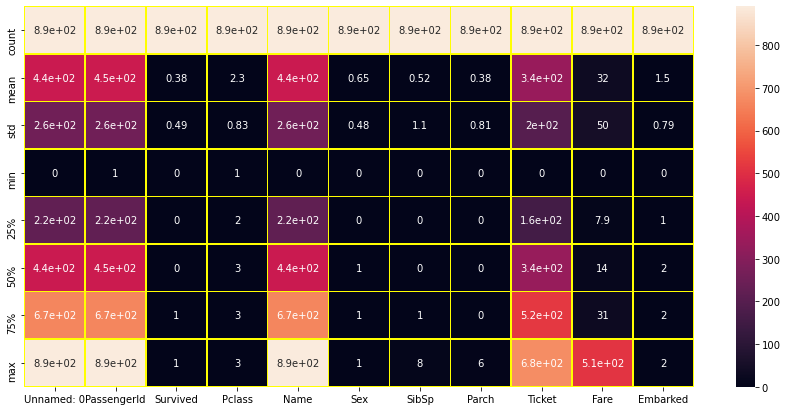

In [463]:
plt.figure(figsize=(15,7))
sns.heatmap(report.describe(), annot=True, linewidth=.5,linecolor='yellow')

In [464]:
report.corr()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
Unnamed: 0,1.000000,1.000000,-0.005028,-0.035330,-0.041324,0.043136,-0.057686,-0.001657,-0.056852,0.012703,0.013166
PassengerId,1.000000,1.000000,-0.005028,-0.035330,-0.041324,0.043136,-0.057686,-0.001657,-0.056852,0.012703,0.013166
Survived,-0.005028,-0.005028,1.000000,-0.335549,-0.059075,-0.541585,-0.034040,0.083151,-0.160931,0.255290,-0.169718
Pclass,-0.035330,-0.035330,-0.335549,1.000000,0.054837,0.127741,0.081656,0.016824,0.315959,-0.548193,0.164681
Name,-0.041324,-0.041324,-0.059075,0.054837,1.000000,0.022087,-0.016558,-0.048533,0.049406,-0.050396,-0.006849
Sex,0.043136,0.043136,-0.541585,0.127741,0.022087,1.000000,-0.116348,-0.247508,0.055024,-0.179958,0.110320
SibSp,-0.057686,-0.057686,-0.034040,0.081656,-0.016558,-0.116348,1.000000,0.414542,0.077995,0.160887,0.068900
Parch,-0.001657,-0.001657,0.083151,0.016824,-0.048533,-0.247508,0.414542,1.000000,0.018409,0.217532,0.040449
Ticket,-0.056852,-0.056852,-0.160931,0.315959,0.049406,0.055024,0.077995,0.018409,1.000000,-0.010562,0.000271
Fare,0.012703,0.012703,0.255290,-0.548193,-0.050396,-0.179958,0.160887,0.217532,-0.010562,1.000000,-0.226311


In [465]:
report.corr()['Survived'].sort_values()

Sex           -0.541585
Pclass        -0.335549
Embarked      -0.169718
Ticket        -0.160931
Name          -0.059075
SibSp         -0.034040
Unnamed: 0    -0.005028
PassengerId   -0.005028
Parch          0.083151
Fare           0.255290
Survived       1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

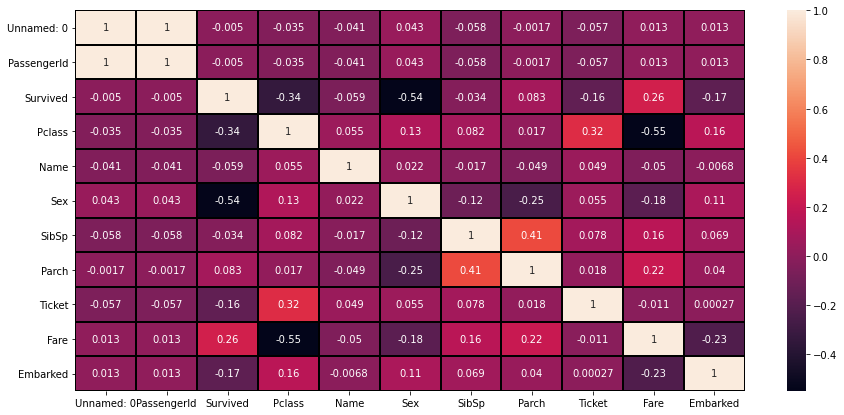

In [466]:
plt.figure(figsize=(15,7))
sns.heatmap(report.corr(), annot=True, linewidth=1,linecolor='black')

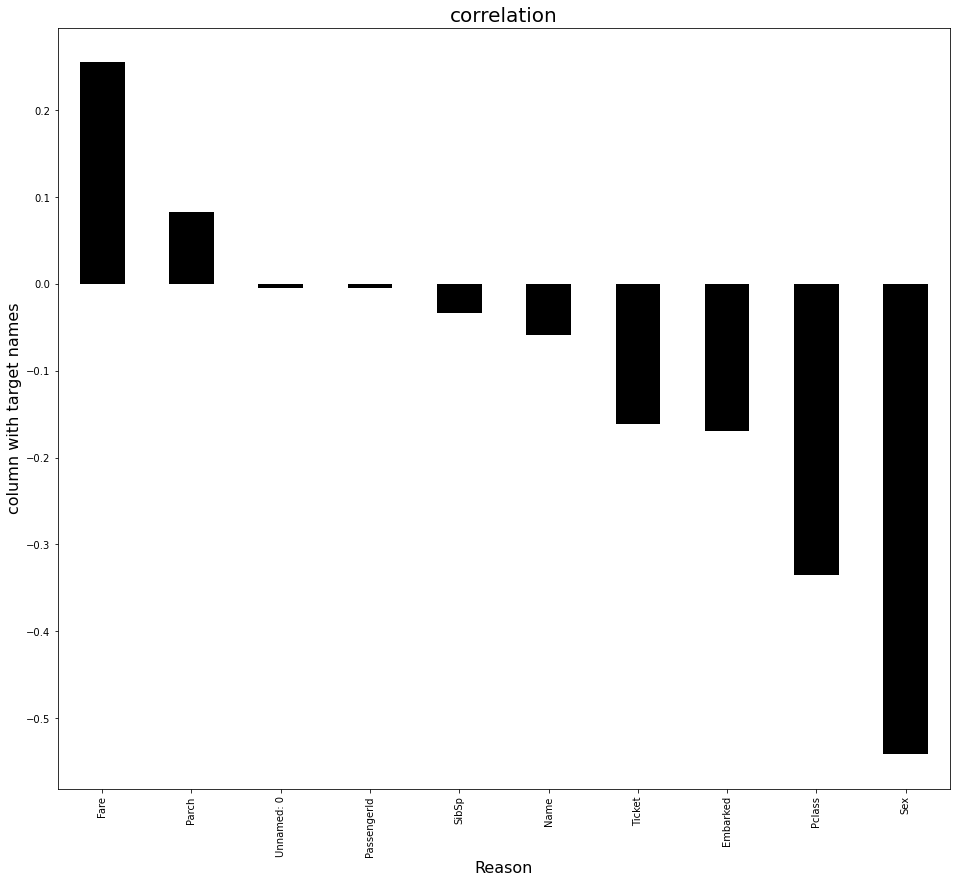

In [467]:
plt.figure(figsize=(16,14))
report.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='black')
plt.xlabel('Reason',fontsize=16)
plt.ylabel('column with target names',fontsize=16)
plt.title('correlation',fontsize=20)
plt.show()

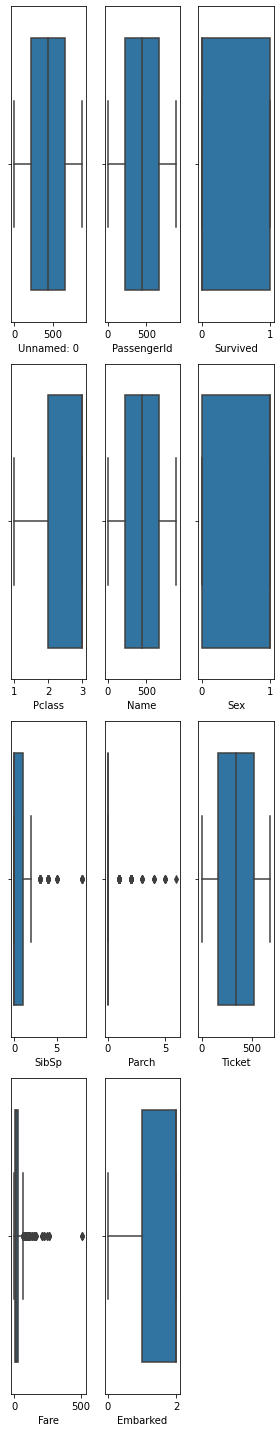

In [468]:
collist=report.columns.values
ncol=3
nrows=4
plt.figure(figsize=(nrows,5*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(report[collist[i]])
    plt.tight_layout()

In [469]:
#check skewness in data
report.skew().sort_values()

Embarked      -1.261367
Pclass        -0.636998
Sex           -0.625625
Ticket        -0.000959
Unnamed: 0     0.000000
PassengerId    0.000000
Name           0.000000
Survived       0.484568
Parch          2.745160
SibSp          3.691058
Fare           4.801440
dtype: float64

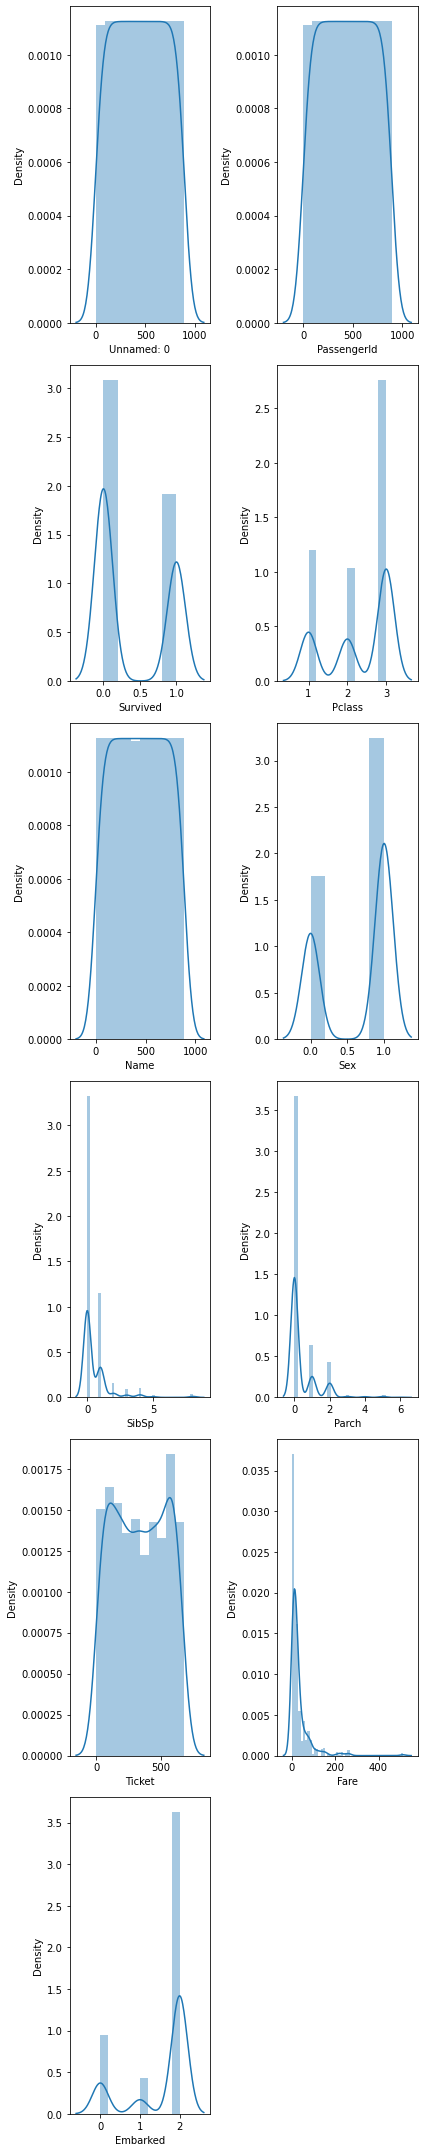

In [470]:
#distribution plot to check skewness
collist=report.columns.values
ncol=2
nrows=6
plt.figure(figsize=(nrows,5*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(report[collist[i]])
    plt.tight_layout()

In [471]:
#outliers removal
report.shape

(889, 11)

In [472]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(report))
threshold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  67,  70,  85,  87, 117, 118, 158,
        163, 166, 170, 179, 181, 200, 232, 257, 260, 265, 277, 298, 310,
        323, 340, 359, 376, 379, 385, 436, 437, 437, 479, 526, 540, 541,
        556, 566, 609, 637, 677, 678, 682, 685, 688, 699, 715, 729, 735,
        736, 741, 773, 778, 786, 791, 812, 823, 844, 848, 856, 861, 883]),
 array([7, 6, 7, 9, 6, 6, 6, 6, 7, 9, 9, 6, 6, 6, 7, 6, 6, 6, 6, 6, 9, 6,
        6, 6, 9, 9, 6, 9, 7, 9, 9, 6, 7, 7, 9, 6, 9, 6, 6, 9, 7, 7, 7, 7,
        9, 6, 6, 9, 9, 9, 9, 7, 9, 9, 7, 9, 6, 6, 6, 6, 6, 6, 7, 6, 7]))

In [473]:
np.abs(zscore(report))<0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [474]:
report_1=report[(z<3).all(axis=1)]
report_1

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,108.0,1.0,1,0,522.0,7.2500,2.0
1,1,2,1,1,190.0,0.0,1,0,595.0,71.2833,0.0
2,2,3,1,3,353.0,0.0,0,0,668.0,7.9250,2.0
3,3,4,1,1,272.0,0.0,1,0,48.0,53.1000,2.0
4,4,5,0,3,15.0,1.0,0,0,471.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,547.0,1.0,0,0,100.0,13.0000,2.0
887,887,888,1,1,303.0,0.0,0,0,14.0,30.0000,2.0
888,888,889,0,3,412.0,0.0,1,2,674.0,23.4500,2.0
889,889,890,1,1,81.0,1.0,0,0,8.0,30.0000,0.0


In [475]:
report_1.shape

(825, 11)

In [476]:
#to know the percentage loss
loss_data=((889-825)/889)*100
loss_data

7.19910011248594

In [535]:
X=report.drop('Survived',axis=1)
Y=report['Survived']

In [578]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=821,test_size=0.25)


In [579]:
X_train.shape

(666, 10)

In [580]:
X_test.shape

(223, 10)

In [581]:
X_train.head()

,Unnamed: 0,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
794,794,795,3,201.0,1.0,0,0,349.0,7.8958,2.0
86,86,87,3,255.0,1.0,1,3,675.0,34.3750,2.0
22,22,23,3,522.0,0.0,0,0,277.0,8.0292,1.0
202,202,203,3,402.0,1.0,0,0,241.0,6.4958,2.0
623,623,624,3,327.0,1.0,0,0,399.0,7.8542,2.0


In [582]:
from sklearn.linear_model import LogisticRegression

In [583]:
log_reg=LogisticRegression()


In [584]:
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [585]:
predictions=log_reg.predict(X_test)

In [586]:
predictions

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1])

In [587]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       140
           1       0.72      0.69      0.70        83

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



In [588]:
accuracy_score(predictions,Y_test)

0.7847533632286996

In [593]:
maxAccu=0
minRs=0
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=670)
    lr.fit(X_train,Y_train)
    predict=lr.predict(X_test)
    acc=accuracy_score(Y_test,predict)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
    print("Best Accuracy is:-",maxAccu,"on random state",maxRs)

Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random state 0
Best Accuracy is:- 0.8340807174887892 on random 

In [594]:
from sklearn.metrics import confusion_matrix,classification_report
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=670)
print("Accuracy",accuracy_score(Y_test,predict)*100)
print(classification_report(Y_test,predict))
print(confusion_matrix(Y_test,predict))


Accuracy 83.40807174887892
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       143
           1       0.80      0.71      0.75        80

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223

[[129  14]
 [ 23  57]]


In [595]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_test,Y_test)
preddtc=dtc.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predict)*100)
print(classification_report(Y_test,predict))
print(confusion_matrix(Y_test,predict))


Accuracy 83.40807174887892
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       143
           1       0.80      0.71      0.75        80

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223

[[129  14]
 [ 23  57]]


In [597]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_test,Y_test)
predrfc=rfc.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predict)*100)
print(classification_report(Y_test,predict))
print(confusion_matrix(Y_test,predict))


Accuracy 83.40807174887892
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       143
           1       0.80      0.71      0.75        80

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223

[[129  14]
 [ 23  57]]


In [609]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predsvc)*100)
print(classification_report(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))


Accuracy 69.05829596412556
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       143
           1       0.66      0.29      0.40        80

    accuracy                           0.69       223
   macro avg       0.68      0.60      0.60       223
weighted avg       0.68      0.69      0.65       223

[[131  12]
 [ 57  23]]


In [613]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,X,Y,cv=5)
print("Cv score of logistic Regression Model is:-",scr.mean()*100)

Cv score of logistic Regression Model is:- 77.16879324573098


In [614]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dtc,X,Y,cv=5)
print("Cv score of Decision Tree Classifier is:-",scr.mean()*100)

Cv score of Decision Tree Classifier is:- 70.87475401510824


In [615]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rfc,X,Y,cv=5)
print("Cv score of Random Forest Classifier is:-",scr.mean()*100)

Cv score of Random Forest Classifier is:- 79.97968640893798


In [632]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],
     'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

gcv=GridSearchCV(rfc,parameters,cv=5,scoring='accuracy')
gcv.fit(X_train,Y_train)
gcv.best_params_



{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [636]:
gcv_pred=gcv.best_estimator_.predict(X_test)
accuracy_score(Y_test,gcv_pred)*100

82.0627802690583

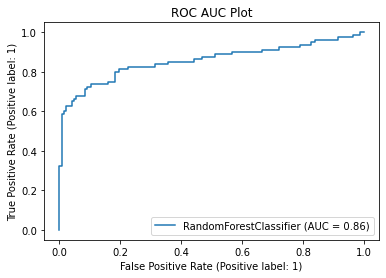

In [638]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv.best_estimator_,X_test,Y_test)
plt.title("ROC AUC Plot")
plt.show()

In [640]:
import joblib
joblib.dump(gcv.best_estimator_,"Titanic_Model")

['Titanic_Model']